In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [3]:
# Cargar el archivo parquet
df = pd.read_parquet("C:/Users/javier.sdiaz/Desktop/BootCamp/DS102024/3-MachineLearning/EDA_2/train.parquet")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


## 1. INSPECCIÓN INICIAL

In [4]:
# Resumen del DataFrame

print("Dimensiones del DataFrame:", df.shape)
print("\nInformación del DataFrame:")
print(df.info())

Dimensiones del DataFrame: (912, 13)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB
None


In [5]:
# Resumen estadístico
print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))


Estadísticas descriptivas:
          laptop_ID Company Product  TypeName Inches   ScreenResolution  \
count    912.000000     912     912       912    912                912   
unique          NaN      19     484         6     18                 38   
top             NaN    Dell  XPS 13  Notebook   15.6  Full HD 1920x1080   
freq            NaN     214      21       498    461                357   
mean     663.118421     NaN     NaN       NaN    NaN                NaN   
std      380.713558     NaN     NaN       NaN    NaN                NaN   
min        1.000000     NaN     NaN       NaN    NaN                NaN   
25%      339.750000     NaN     NaN       NaN    NaN                NaN   
50%      666.500000     NaN     NaN       NaN    NaN                NaN   
75%      985.250000     NaN     NaN       NaN    NaN                NaN   
max     1320.000000     NaN     NaN       NaN    NaN                NaN   

                               Cpu  Ram     Memory                    G

## 2. LIMPIEZA DE DATOS

- Eliminar o imputar valores faltantes.
- Manejar valores duplicados (si los hay).
- Verificar la consistencia de los datos.

In [6]:
# Valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [7]:
# Número de filas duplicadas
duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")


Número de filas duplicadas: 0


In [8]:
print("\nValores únicos por columna:")
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"{column}: {df[column].unique()[:10]}")


Valores únicos por columna:
Company: ['Dell' 'Asus' 'HP' 'Toshiba' 'Lenovo' 'Google' 'LG' 'MSI' 'Acer'
 'Mediacom']
Product: ['Inspiron 3179' 'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon' 'ZBook 15'
 'Pavilion X360' 'Tecra A50-C-1ZV' 'Vostro 5468' '250 G6' 'Latitude 3580'
 'IdeaPad 310-15IKB' 'IdeaPad Y700-15ACZ']
TypeName: ['2 in 1 Convertible' 'Gaming' 'Workstation' 'Notebook' 'Ultrabook'
 'Netbook']
Inches: ['11.6' '15.6' '13.3' '14.0' '12.3' '17.3' '12.5' '13.9' '15.4' '13.5']
ScreenResolution: ['Touchscreen 1366x768' 'Full HD 1920x1080'
 'IPS Panel Touchscreen 1366x768' '1366x768' 'IPS Panel Full HD 1920x1080'
 'Touchscreen 2400x1600' 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'IPS Panel 1366x768'
 '4K Ultra HD / Touchscreen 3840x2160']
Cpu: ['Intel Core M 7Y30 1.0GHz' 'AMD FX 9830P 3GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 7200U 2.5GHz'
 'Intel Core i5 6200U 2.3GHz' 'Intel Core i3 6006U 2GHz'
 'AMD FX 8800P 2.1GHz' 'Intel Core i7 7500U 2

## 3. FEATURE ENGINEERING

- Crear nuevas columnas.
- Codificar variables categóricas.
- Normalizar variables numéricas (si corresponde).

In [9]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


In [10]:
print(df['ScreenResolution'].unique())

['Touchscreen 1366x768' 'Full HD 1920x1080'
 'IPS Panel Touchscreen 1366x768' '1366x768' 'IPS Panel Full HD 1920x1080'
 'Touchscreen 2400x1600' 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'IPS Panel 1366x768'
 '4K Ultra HD / Touchscreen 3840x2160' '1600x900'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Retina Display 2880x1800' 'Quad HD+ 3200x1800'
 'Touchscreen / Quad HD+ 3200x1800' 'Touchscreen 2560x1440'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel Retina Display 2560x1600'
 'Touchscreen 2256x1504' 'IPS Panel 2560x1440'
 'IPS Panel Touchscreen 2560x1440' 'IPS Panel Touchscreen 1920x1200'
 'IPS Panel Full HD 2160x1440' 'IPS Panel 4K Ultra HD 3840x2160'
 '1920x1080' 'Touchscreen / Full HD 1920x1080' '2560x1440'
 'IPS Panel Retina Display 2304x1440' 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Retina Display 2736x1824' '4K Ultra HD 3840x2160' '1440x900'
 'IPS Panel Quad HD+ 2560x1440' 'Touc

In [11]:
import re

def separate_screen_resolution(resolution_str):
    # Extract resolution
    resolution_match = re.search(r'(\d+)\s*x\s*(\d+)', str(resolution_str))
    resolution = f"{resolution_match.group(1)}x{resolution_match.group(2)}" if resolution_match else None
    
    # Extract screen type
    screen_types = ['Touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', '4K Ultra HD', 'Retina Display']
    found_types = [type for type in screen_types if type.lower() in resolution_str.lower()]
    screen_type = ' / '.join(found_types) if found_types else None
    
    return screen_type, resolution

# Apply the function
df[['ScreenType', 'Resolution']] = df['ScreenResolution'].apply(separate_screen_resolution).apply(pd.Series)

In [12]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0,Touchscreen,1366x768
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0,Full HD,1920x1080
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0,Full HD,1920x1080
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6,Touchscreen / IPS Panel,1366x768
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0,None,1366x768


In [13]:
df['Cpu'].unique()

array(['Intel Core M 7Y30 1.0GHz', 'AMD FX 9830P 3GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i3 6006U 2GHz',
       'AMD FX 8800P 2.1GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i5 7Y57 1.2GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i5 6300HQ 2.3GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i5 8250U 1.6GHz',
       'Intel Celeron Quad Core N3450 1.1GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i7 7820HQ 2.9GHz',
       'AMD A9-Series 9420 3GHz', 'Intel Pentium Quad Core N3700 1.6GHz',
       'Intel Core i5 7500U 2.7GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 2.2GHz',
       'Intel Atom x5-Z8350 1.44GHz', 'Intel Core i3 6100U 2.3GHz',
       'Intel Core i7 7820HK 2.9GHz

In [14]:
# Separar el tipo de CPU y la memoria (en GHz)
df[['Cpu_Type', 'Memory']] = df['Cpu'].str.extract(r'^(.*)\s(\d+\.?\d*GHz)$')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,Cpu_Type
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,1.0GHz,Intel HD Graphics 615,Windows 10,1.39kg,603.0,Touchscreen,1366x768,Intel Core M 7Y30
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,3GHz,AMD Radeon RX 560,Windows 10,2.45kg,699.0,Full HD,1920x1080,AMD FX 9830P
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,2.8GHz,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0,Full HD,1920x1080,Intel Core i7 7700HQ
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2.5GHz,Intel HD Graphics 620,Windows 10,1.58kg,836.6,Touchscreen / IPS Panel,1366x768,Intel Core i5 7200U
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,2.3GHz,Intel HD Graphics 520,Windows 10,2.2kg,1119.0,None,1366x768,Intel Core i5 6200U


In [15]:
df['OpSys'].unique()

array(['Windows 10', 'Chrome OS', 'Windows 10 S', 'Windows 7', 'Linux',
       'No OS', 'Mac OS X', 'macOS', 'Android'], dtype=object)

In [16]:
df[['OpsysType', 'Version']] = df['OpSys'].str.extract(r'^(Windows|Chrome OS|Linux|No OS|Mac OS X|macOS|Android)(?:\s+(.*))?$')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,Cpu_Type,OpsysType,Version
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,1.0GHz,Intel HD Graphics 615,Windows 10,1.39kg,603.0,Touchscreen,1366x768,Intel Core M 7Y30,Windows,10
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,3GHz,AMD Radeon RX 560,Windows 10,2.45kg,699.0,Full HD,1920x1080,AMD FX 9830P,Windows,10
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,2.8GHz,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0,Full HD,1920x1080,Intel Core i7 7700HQ,Windows,10
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2.5GHz,Intel HD Graphics 620,Windows 10,1.58kg,836.6,Touchscreen / IPS Panel,1366x768,Intel Core i5 7200U,Windows,10
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,2.3GHz,Intel HD Graphics 520,Windows 10,2.2kg,1119.0,None,1366x768,Intel Core i5 6200U,Windows,10


In [17]:
df['Gpu'].unique()


array(['Intel HD Graphics 615', 'AMD Radeon RX 560',
       'Nvidia Quadro M2200', 'Intel HD Graphics 620',
       'Intel HD Graphics 520', 'AMD Radeon 520', 'Nvidia GeForce 920MX',
       'AMD Radeon R9 M385', 'AMD Radeon R7 M445',
       'Intel HD Graphics 500', 'Nvidia GeForce GTX 960M',
       'Intel UHD Graphics 620', 'AMD Radeon R5 M315',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R5 M430', 'AMD Radeon 530',
       'Nvidia Quadro M2200M', 'Intel HD Graphics',
       'Nvidia GeForce GTX 1060', 'Nvidia Quadro M1200', 'AMD Radeon R5',
       'AMD Radeon RX 580', 'Nvidia GeForce 940MX', 'AMD Radeon R5 M330',
       'AMD Radeon R4 Graphics', 'Intel HD Graphics 400',
       'Intel Iris Plus Graphics 640', 'Nvidia GeForce GT 940MX',
       'Intel Iris Pro Graphics', 'AMD Radeon R7 M465',
       'Nvidia GeForce GTX 1070', 'Intel HD Graphics 630',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 405',
       'AMD Radeon RX 550', 'Nvidia GeForce GTX 1050 Ti',
       'AMD Radeon R5 M420

In [18]:
df[['Manufacturer', 'MemoryGraphic']] = df['Gpu'].str.extract(r'^(Intel|AMD|Nvidia|ARM)\s+([\w\s]+)')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,Cpu_Type,OpsysType,Version,Manufacturer,MemoryGraphic
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,1.0GHz,Intel HD Graphics 615,Windows 10,1.39kg,603.0,Touchscreen,1366x768,Intel Core M 7Y30,Windows,10,Intel,HD Graphics 615
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,3GHz,AMD Radeon RX 560,Windows 10,2.45kg,699.0,Full HD,1920x1080,AMD FX 9830P,Windows,10,AMD,Radeon RX 560
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,2.8GHz,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0,Full HD,1920x1080,Intel Core i7 7700HQ,Windows,10,Nvidia,Quadro M2200
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2.5GHz,Intel HD Graphics 620,Windows 10,1.58kg,836.6,Touchscreen / IPS Panel,1366x768,Intel Core i5 7200U,Windows,10,Intel,HD Graphics 620
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,2.3GHz,Intel HD Graphics 520,Windows 10,2.2kg,1119.0,None,1366x768,Intel Core i5 6200U,Windows,10,Intel,HD Graphics 520


In [19]:
df['Product'].unique()

array(['Inspiron 3179', 'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon',
       'ZBook 15', 'Pavilion X360', 'Tecra A50-C-1ZV', 'Vostro 5468',
       '250 G6', 'Latitude 3580', 'IdeaPad 310-15IKB',
       'IdeaPad Y700-15ACZ', 'EliteBook 840', 'Inspiron 5567',
       'Pixelbook (Core', 'VivoBook E201NA', 'Latitude E5570',
       'ProBook 650', 'IdeaPad Y700-15ISK', 'Yoga 500-14ISK',
       'Inspiron 5579', 'Vostro 3559', 'Gram 15Z970', 'Yoga 11e',
       'XPS 13', 'Latitude 5480', 'ProBook 450', 'GP62M Leopard',
       'Inspiron 3567', 'Inspiron 5770', 'ThinkPad Yoga', 'Thinkpad P51',
       'Latitude 7280', 'Legion Y720-15IKB', 'Precision M5520',
       'Aspire 3', 'Omen 17-an012dx', 'VivoBook Max', 'E5 774G',
       'Zbook 15', 'Inspiron 3552', 'B51-80 (i5-6200U/8GB/1TB/Radeon',
       'SmartBook Edge', 'IdeaPad 320-17ISK', 'Inspiron 5370',
       'Gram 15Z975', 'Gram 14Z970',
       'B51-80 (i7-6500U/4GB/1008GB/FHD/W7)',
       'FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce', 'Probook 640',
 

In [20]:
df['Model Base'] = df['Product'].str.extract(r'^([^(/]+)')  # Extrae el texto antes de un paréntesis o diagonal
df['Specifications'] = df['Product'].str.extract(r'\((.*)\)|/(.*)').bfill(axis=1)[0]  # Extrae el contenido entre paréntesis o después de una diagonal

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,ScreenType,Resolution,Cpu_Type,OpsysType,Version,Manufacturer,MemoryGraphic,Model Base,Specifications
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,1.0GHz,Intel HD Graphics 615,...,603.0,Touchscreen,1366x768,Intel Core M 7Y30,Windows,10,Intel,HD Graphics 615,Inspiron 3179,NaN
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,3GHz,AMD Radeon RX 560,...,699.0,Full HD,1920x1080,AMD FX 9830P,Windows,10,AMD,Radeon RX 560,FX550IK-DM018T,8GB/1TB/Radeon
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,2.8GHz,Nvidia Quadro M2200,...,2419.0,Full HD,1920x1080,Intel Core i7 7700HQ,Windows,10,Nvidia,Quadro M2200,ZBook 15,NaN
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,2.5GHz,Intel HD Graphics 620,...,836.6,Touchscreen / IPS Panel,1366x768,Intel Core i5 7200U,Windows,10,Intel,HD Graphics 620,Pavilion X360,NaN
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,2.3GHz,Intel HD Graphics 520,...,1119.0,None,1366x768,Intel Core i5 6200U,Windows,10,Intel,HD Graphics 520,Tecra A50-C-1ZV,NaN


In [32]:
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
df['Memory'] = df['Memory'].astype(str)
df['Memory'] = df['Memory'].str.replace('GHz', '').astype(float)



In [37]:
df[['width', 'height']] = df['Resolution'].str.split('x', expand=True)

df['width'] = df['width'].astype(int)
df['height'] = df['height'].astype(int)

In [40]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'ScreenType', 'Resolution', 'Cpu_Type', 'OpsysType',
       'Version', 'Manufacturer', 'MemoryGraphic', 'Model Base',
       'Specifications', 'ancho', 'largo', 'width', 'height'],
      dtype='object')

In [42]:
df_filtered = df.drop(columns=['ScreenResolution', 'Cpu','Gpu','OpSys','ancho','largo','Product'])
df_filtered

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Weight,Price_euros,ScreenType,Resolution,Cpu_Type,OpsysType,Version,Manufacturer,MemoryGraphic,Model Base,Specifications,width,height
0,599,Dell,2 in 1 Convertible,11.6,4.0,1.0,1.39kg,603.00,Touchscreen,1366x768,Intel Core M 7Y30,Windows,10,Intel,HD Graphics 615,Inspiron 3179,NaN,1366,768
1,92,Asus,Gaming,15.6,8.0,3.0,2.45kg,699.00,Full HD,1920x1080,AMD FX 9830P,Windows,10,AMD,Radeon RX 560,FX550IK-DM018T,8GB/1TB/Radeon,1920,1080
2,744,HP,Workstation,15.6,16.0,2.8,2.6kg,2419.00,Full HD,1920x1080,Intel Core i7 7700HQ,Windows,10,Nvidia,Quadro M2200,ZBook 15,NaN,1920,1080
3,729,HP,2 in 1 Convertible,13.3,8.0,2.5,1.58kg,836.60,Touchscreen / IPS Panel,1366x768,Intel Core i5 7200U,Windows,10,Intel,HD Graphics 620,Pavilion X360,NaN,1366,768
4,957,Toshiba,Notebook,15.6,8.0,2.3,2.2kg,1119.00,None,1366x768,Intel Core i5 6200U,Windows,10,Intel,HD Graphics 520,Tecra A50-C-1ZV,NaN,1366,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Netbook,11.6,4.0,1.6,1.35kg,355.00,IPS Panel,1366x768,Intel Celeron Dual Core N3060,Chrome OS,NaN,Intel,HD Graphics 400,Chromebook 11,NaN,1366,768
908,626,Acer,2 in 1 Convertible,11.6,4.0,1.6,1.25kg,379.00,Touchscreen / IPS Panel,1366x768,Intel Celeron Quad Core N3160,Chrome OS,NaN,Intel,HD Graphics 400,CB5-132T-C9KK,4GB/32GB/Chrome,1366,768
909,225,Dell,Notebook,15.6,8.0,1.6,2.2kg,677.35,Full HD,1920x1080,Intel Core i5 8250U,Linux,NaN,AMD,Radeon 520,Inspiron 3576,NaN,1920,1080
910,17,Dell,Notebook,15.6,8.0,2.7,2.2kg,745.00,Full HD,1920x1080,Intel Core i7 7500U,Windows,10,AMD,Radeon R5 M430,Inspiron 3567,NaN,1920,1080


In [43]:
df_filtered.to_csv('train.csv', index=False, sep=';', encoding='utf-8')

## 4. ANÁLISIS UNIVARIANTE

- Histogramas y boxplots para variables numéricas.
- Conteos y gráficas de barras para variables categóricas.

In [44]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'ScreenType', 'Resolution', 'Cpu_Type', 'OpsysType',
       'Version', 'Manufacturer', 'MemoryGraphic', 'Model Base',
       'Specifications', 'ancho', 'largo', 'width', 'height'],
      dtype='object')

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


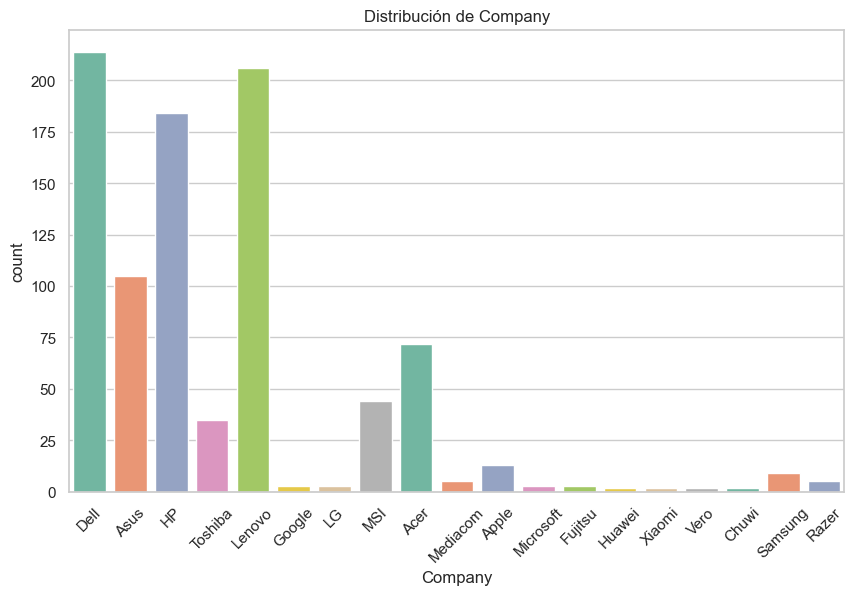

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


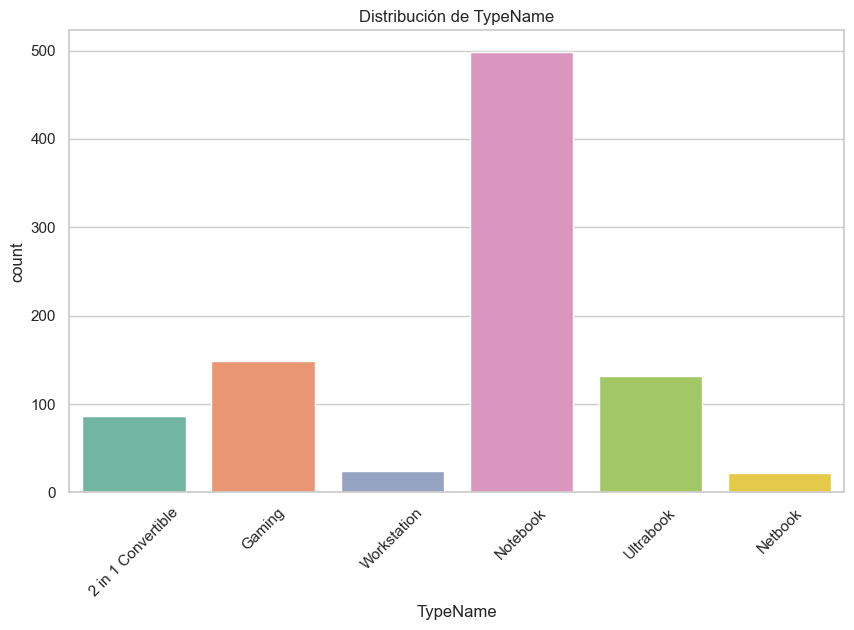

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


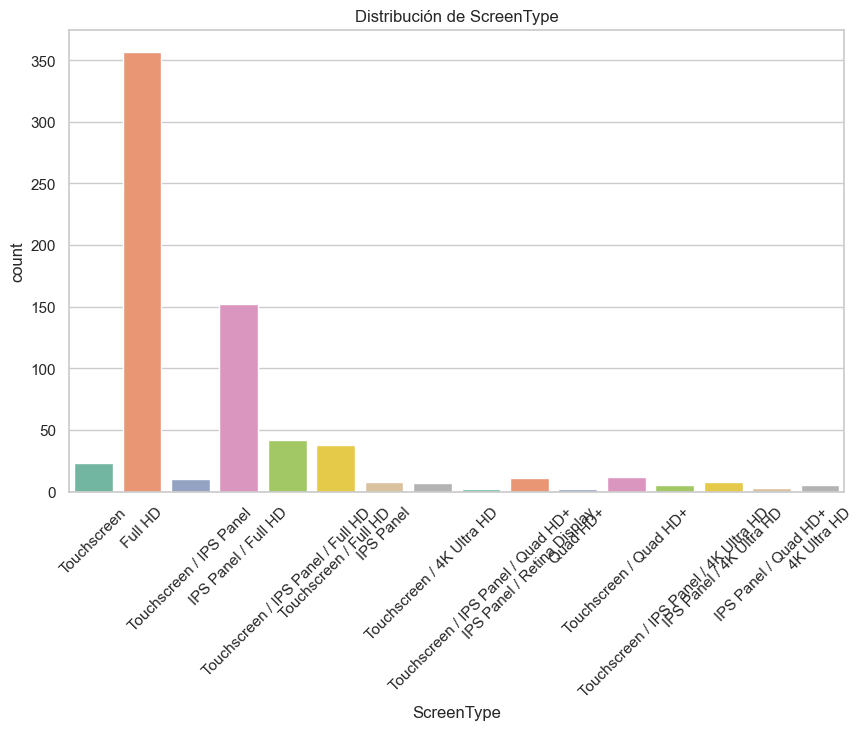

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


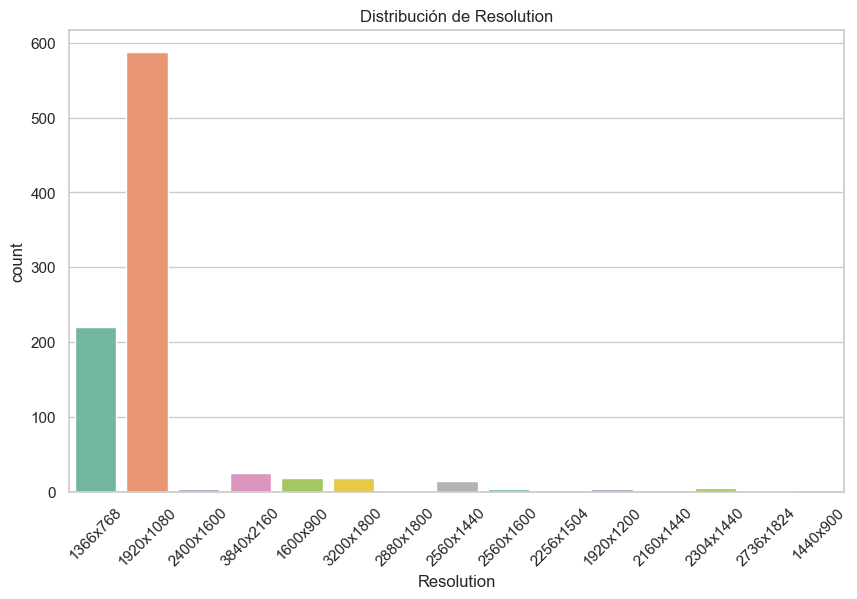

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


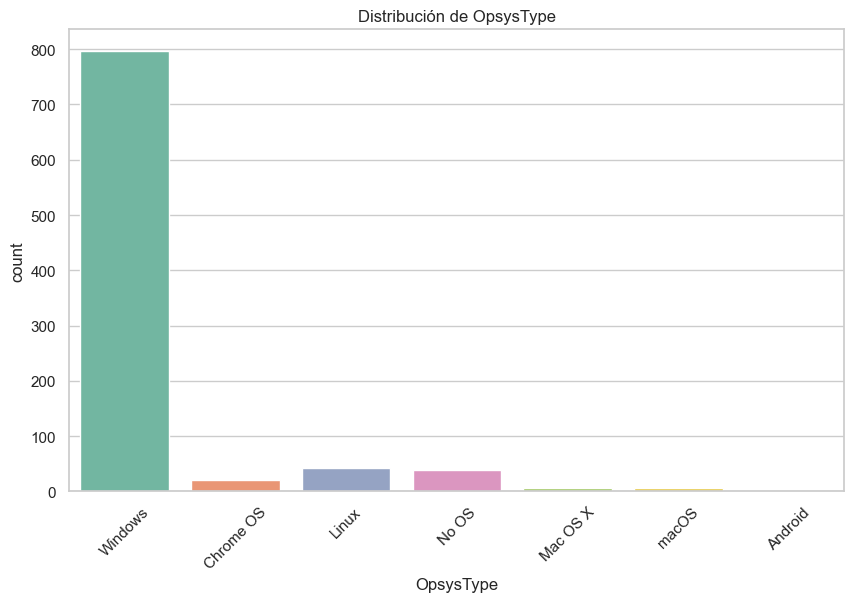

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2084254631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2')


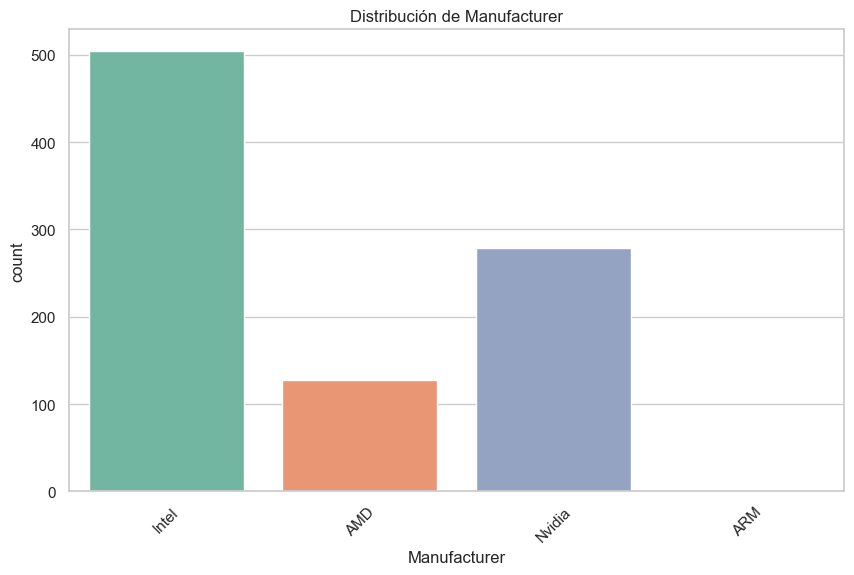

In [55]:
# Lista de variables categóricas
categorical_columns = ['Company', 'TypeName', 'ScreenType', 'Resolution', 'OpsysType', 'Manufacturer',]

# Mostrar la distribución de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

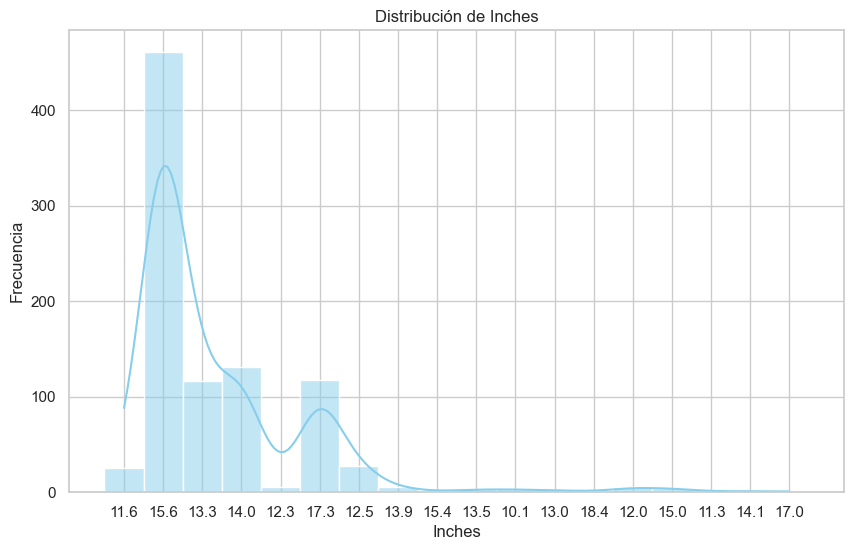

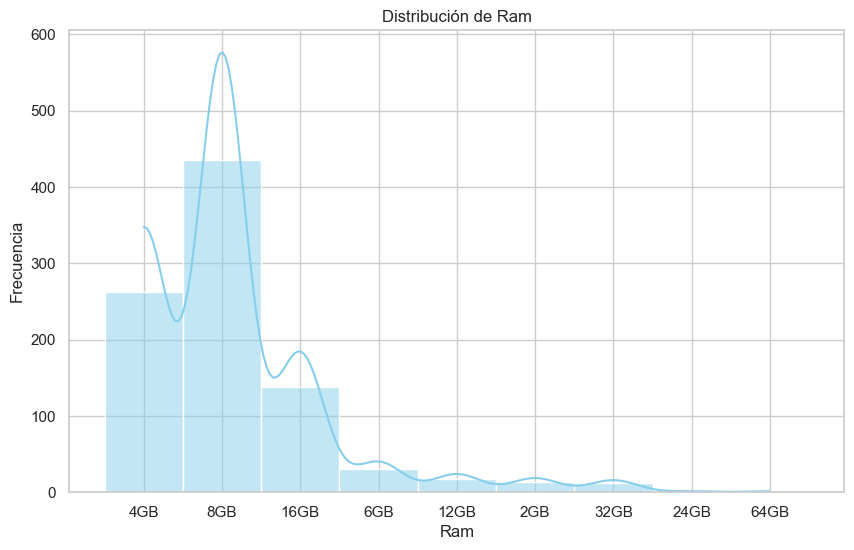

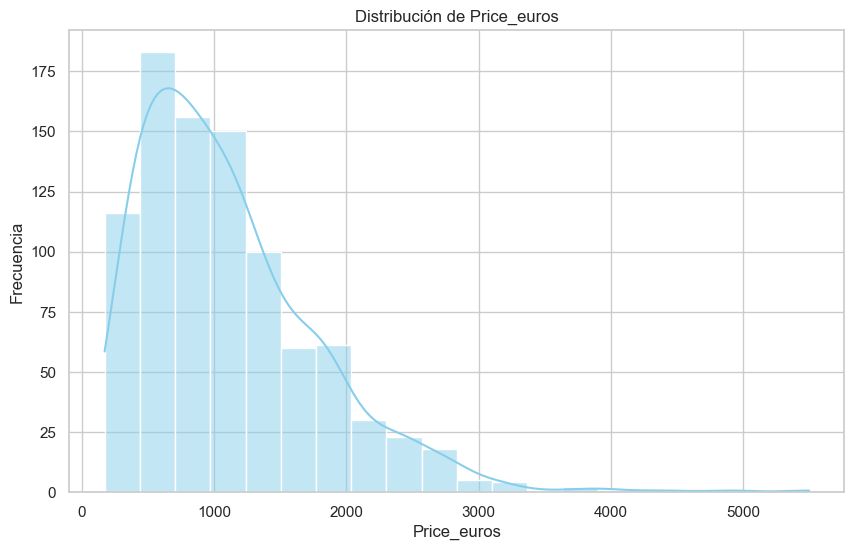

       Price_euros
count   912.000000
mean   1111.262533
std     682.109694
min     174.000000
25%     598.742500
50%     977.000000
75%    1472.650000
max    5499.000000


In [58]:
# Lista de variables numéricas
numeric_columns = ['Inches', 'Ram', 'Price_euros']

# Mostrar el histograma de cada variable numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Estadísticas descriptivas de las variables numéricas
print(df[numeric_columns].describe())

## 5. ANÁLISIS BIVARIANTE

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\1871173364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='Price_euros', palette='Set2')


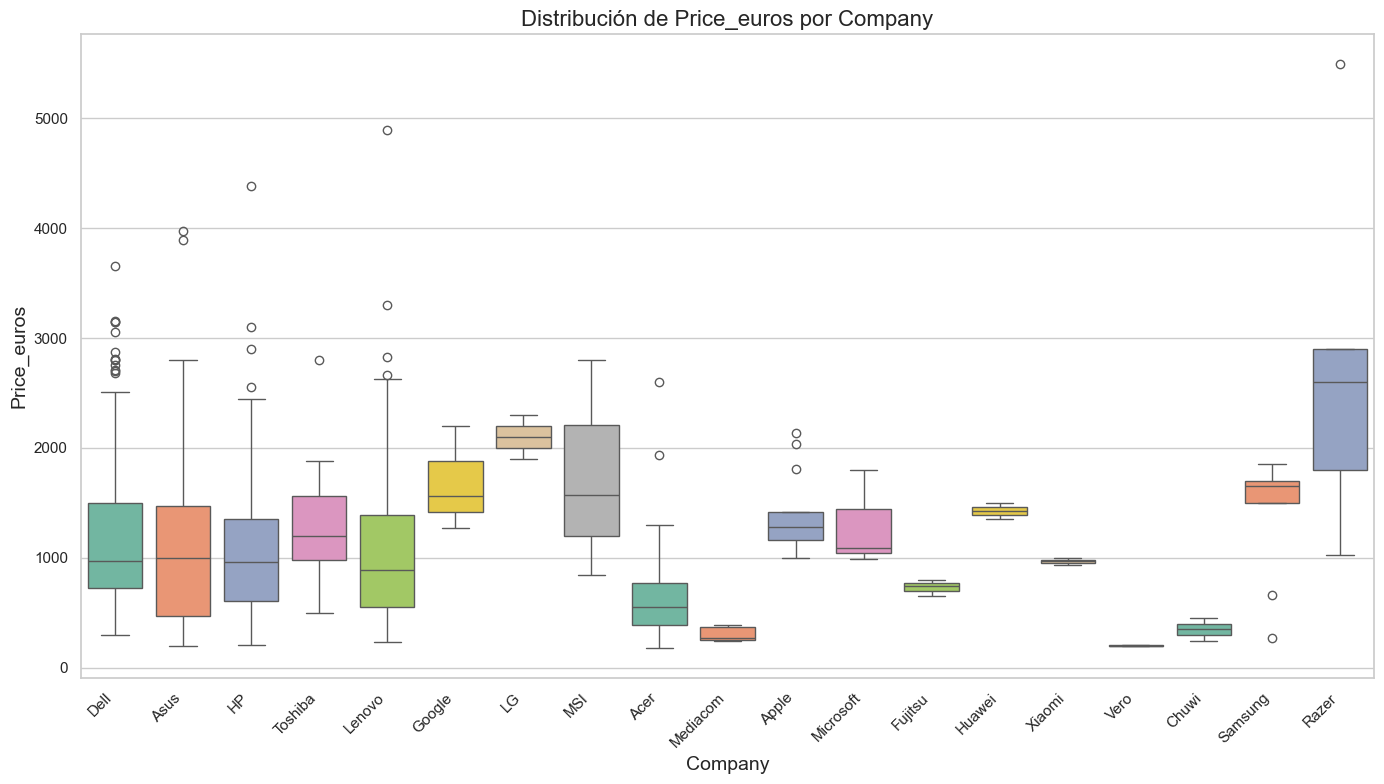

In [35]:
plt.figure(figsize=(14, 8))

# Crear el boxplot
sns.boxplot(data=df, x='Company', y='Price_euros', palette='Set2')

# Personalización del gráfico
plt.title('Distribución de Price_euros por Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price_euros', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2175316682.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')
C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\2175316682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')


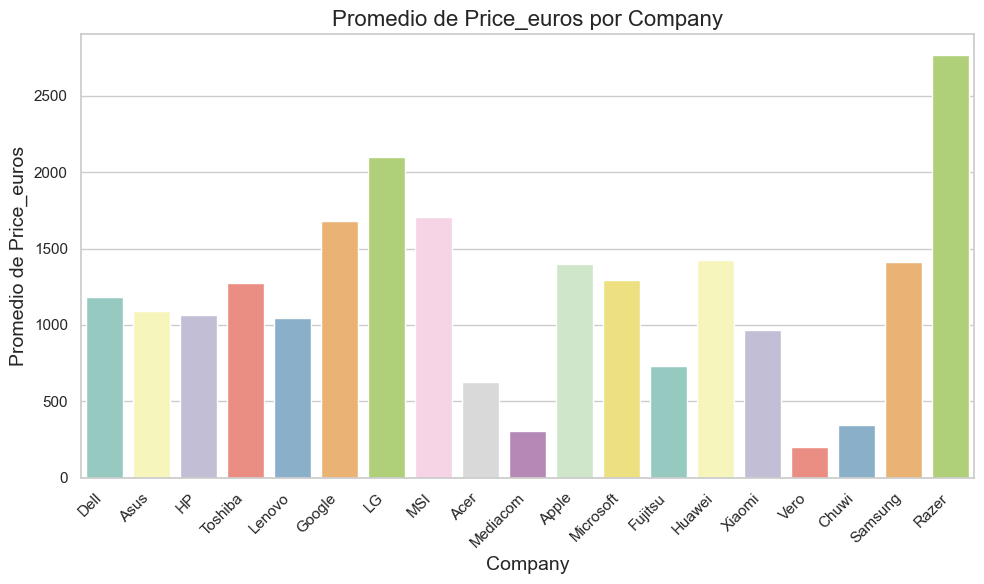

In [36]:
sns.barplot(data=df, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')

# Personalización del gráfico
plt.title('Promedio de Price_euros por Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Promedio de Price_euros', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

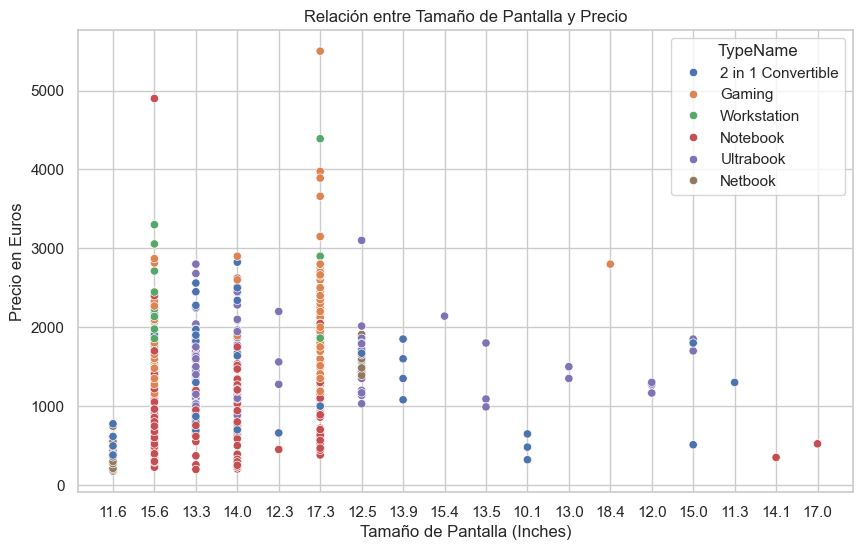

In [43]:
# Relación entre "Inches" y "Precio"
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Inches', y='Price_euros', hue='TypeName', palette='deep')
plt.title('Relación entre Tamaño de Pantalla y Precio')
plt.xlabel('Tamaño de Pantalla (Inches)')
plt.ylabel('Precio en Euros')
plt.show()

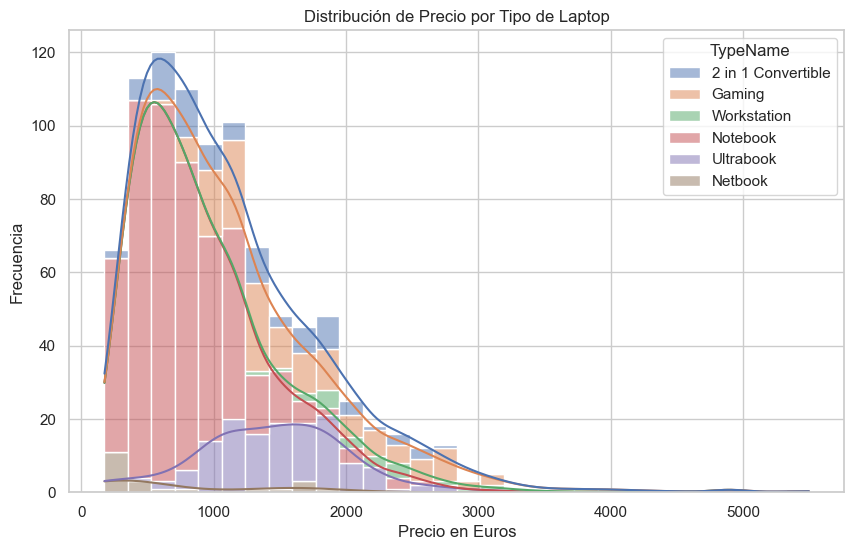

In [44]:
# Distribución de "Precio" por "Tipo de Laptop"
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price_euros', hue='TypeName', kde=True, multiple='stack')
plt.title('Distribución de Precio por Tipo de Laptop')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_9008\1354050318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TypeName', y='Price_euros', palette='Blues')


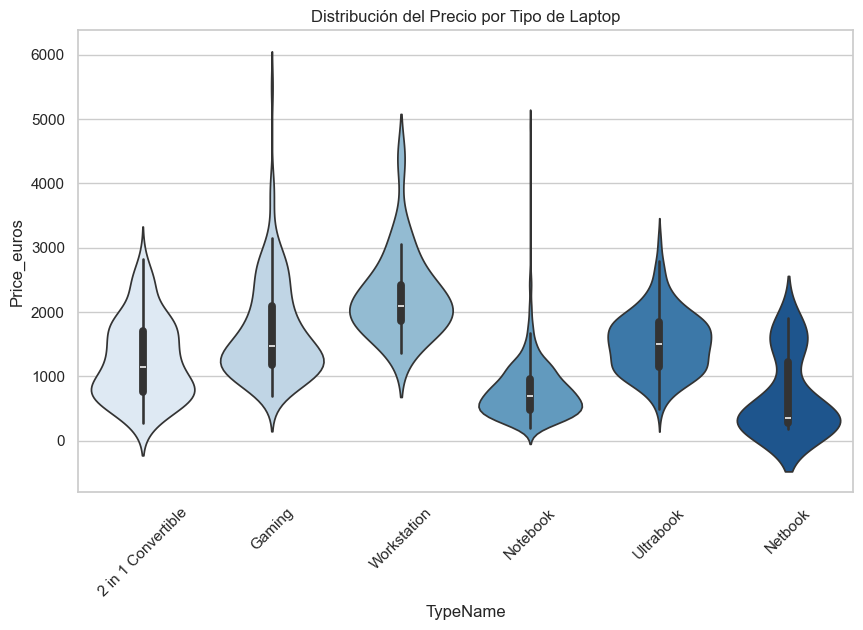

In [47]:
# Relación entre "TypeName" y "Precio" con un Violinplot
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='TypeName', y='Price_euros', palette='Blues')
plt.title('Distribución del Precio por Tipo de Laptop')
plt.xticks(rotation=45)
plt.show()

## 6. HIPÓTESIS

1. Hipótesis sobre la relación entre "Tipo de Laptop" y "Precio":
Hipótesis: Las laptops de tipo "Gaming" tienen un precio más alto que las laptops de tipo "Notebook" o "Convertible".

Justificación: Las laptops Gaming suelen tener componentes de mayor rendimiento (procesadores más potentes, tarjetas gráficas dedicadas, etc.), lo que podría justificar un precio más elevado en comparación con laptops más sencillas.
2. Hipótesis sobre la relación entre "Cpu" y "Precio":
Hipótesis: Las laptops con procesadores de gama alta (por ejemplo, Intel i7, AMD Ryzen 7) son más caras que las que tienen procesadores de gama baja (por ejemplo, Intel i3, i5).

Justificación: Los procesadores más potentes son componentes clave en laptops de alto rendimiento, lo que típicamente aumenta el precio del producto.
3. Hipótesis sobre la relación entre "Ram" y "Tipo de Laptop":
Hipótesis: Las laptops de tipo "Gaming" tienen una mayor cantidad de memoria RAM que las laptops de tipo "Notebook" o "Convertible".

Justificación: Las laptops para juegos requieren más memoria RAM para ejecutar juegos y aplicaciones demandantes, mientras que las laptops de uso general no necesitan tanto.
4. Hipótesis sobre la relación entre "ScreenResolution" y "Inches":
Hipótesis: Las laptops con pantallas de mayor tamaño (por ejemplo, 15 o 17 pulgadas) tienen una resolución de pantalla más alta (por ejemplo, Full HD o 4K) que las laptops de menor tamaño (por ejemplo, 13 pulgadas).

Justificación: Las laptops más grandes, al tener más espacio para mostrar detalles gráficos, tienden a tener pantallas de resolución más alta para mejorar la experiencia visual.
5. Hipótesis sobre la relación entre "Gpu" y "Precio":
Hipótesis: Las laptops con tarjetas gráficas dedicadas (GPU) tienen un precio más alto que las laptops con tarjetas gráficas integradas.

Justificación: Las tarjetas gráficas dedicadas son componentes que mejoran el rendimiento visual, especialmente para juegos y trabajos gráficos, lo que aumenta el costo del producto.
6. Hipótesis sobre la relación entre "Memory" (Capacidad de almacenamiento) y "Precio":
Hipótesis: Las laptops con mayor capacidad de almacenamiento (por ejemplo, 1 TB o más) son más caras que las laptops con menor capacidad de almacenamiento (por ejemplo, 256 GB o 512 GB).

Justificación: Las laptops con mayor capacidad de almacenamiento suelen ser más caras debido al costo de los discos duros o SSD de mayor capacidad.
7. Hipótesis sobre la relación entre "Tipo de Laptop" y "ScreenResolution":
Hipótesis: Las laptops de tipo "Gaming" o "Convertible" tienen una resolución de pantalla más alta que las laptops de tipo "Notebook".

Justificación: Las laptops Gaming necesitan resoluciones altas para ofrecer una buena experiencia de juego, mientras que las Notebooks tienden a ser más asequibles con resoluciones más bajas.
8. Hipótesis sobre la relación entre "Cpu" y "ScreenResolution":
Hipótesis: Las laptops con procesadores de gama alta (por ejemplo, Intel i7 o AMD Ryzen 7) suelen tener resoluciones de pantalla más altas (por ejemplo, 4K o Full HD) en comparación con las laptops con procesadores más sencillos (por ejemplo, Intel i3 o i5).

Justificación: Los procesadores de gama alta están diseñados para manejar tareas exigentes, lo que a menudo va acompañado de una resolución de pantalla que aprovecha la potencia de procesamiento para una mejor experiencia visual.
9. Hipótesis sobre la relación entre "Gpu" y "Ram":
Hipótesis: Las laptops con tarjetas gráficas dedicadas (GPU) tienen más memoria RAM que las laptops con tarjetas gráficas integradas.

Justificación: Las tarjetas gráficas dedicadas requieren más memoria RAM para manejar gráficos complejos, lo que generalmente se traduce en laptops con una mayor capacidad de RAM.
10. Hipótesis sobre la relación entre "Tipo de Laptop" y "Ram":
Hipótesis: Las laptops de tipo "Gaming" tienen más memoria RAM que las laptops de tipo "Convertible" o "Notebook".

Justificación: Las laptops Gaming deben soportar tareas más exigentes, como juegos, que requieren más RAM. Por otro lado, las laptops Notebook o Convertible están diseñadas para tareas más sencillas y, por lo tanto, no requieren tanta memoria.